In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from tensorflow.keras.models import model_from_json
json_file = open('/content/drive/My Drive/ToMau_GAN/generator.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
generator = model_from_json(loaded_model_json)
generator.load_weights("/content/drive/My Drive/ToMau_GAN/generator.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [30]:
from google.colab import files
uploaded = files.upload()

Saving 3866681_IMG_2073.jpg to 3866681_IMG_2073.jpg


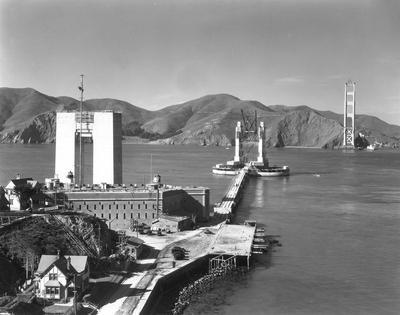

In [33]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img=cv2.imread("/content/20120525__nmij0526impact2.jpg",0)
cv2_imshow(img)
height, width=img.shape[:2]
img2=cv2.resize(img, (256,256))

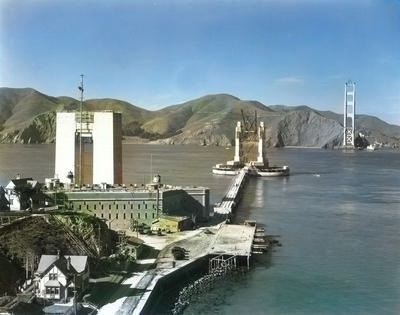

In [34]:
img_re=np.reshape(img2,[1,256,256,1])
predict=generator.predict(img_re)
for i in predict[0]:
  for j in i:
    for k in j:
      if k>255.: k=255.
      if k<0.: k=0.
predict=predict.astype(np.uint8)
img_color=cv2.resize(predict[0], (width, height))
img_lab=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_lab=cv2.cvtColor(img_lab, cv2.COLOR_BGR2LAB)
img_lab[:,:,1:]=img_color[:,:,1:]
cvt=cv2.cvtColor(img_lab, cv2.COLOR_LAB2BGR)
cv2_imshow(cvt)